# Medical Insurance Cost with Linear Regression

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [5]:
df=pd.read_csv("insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Data Inspection

In [8]:
df.shape

(1338, 7)

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data Cleaning

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Exploratory Data Analysis(EDA)

Univariate Analysis

In [12]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Density'>

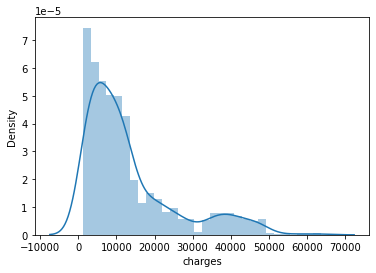

In [13]:
sns.distplot(df['charges'])

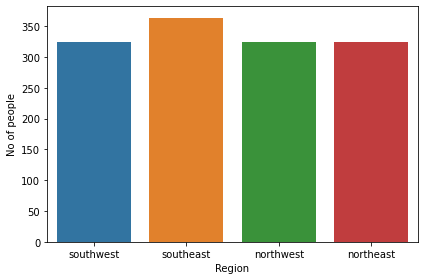

In [14]:
plt1=sns.countplot(df['region'])
plt1.set(xlabel='Region', ylabel='No of people')
plt.tight_layout()
plt.show()

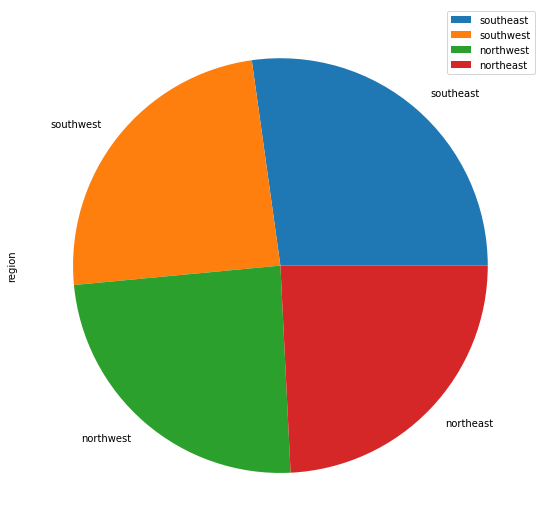

In [15]:
df_sys=pd.DataFrame(df['region'].value_counts())
df_sys.plot.pie(subplots=True,
               labels=df_sys.index.values,
               
               figsize=(15,7.5))
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


In [17]:
# Let's see average charge of people in each region category.

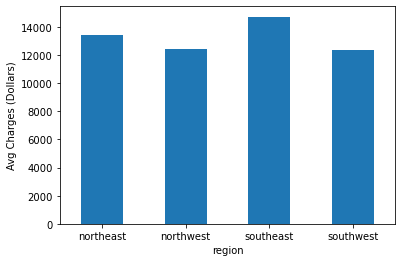

In [19]:
plt1 = df[['region', 'charges']].groupby("region").mean().plot(
    kind='bar',
    legend=False,
)
plt1.set_xlabel("region")
plt1.set_ylabel("Avg Charges (Dollars)")
xticks(rotation=0)
plt.show()

Smoker/Non-Smoker

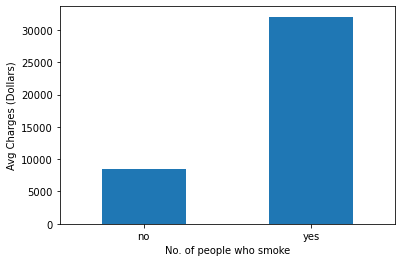

In [38]:
df_smoker = df[['smoker', 'charges']].groupby(
    "smoker",
    as_index=False).mean().rename(columns={'charges': 'Avg Charges'})
plt1 = df_smoker.plot(x='smoker',
                               kind='bar',
                               legend=False,
                               sort_columns=True)
plt1.set_xlabel("No. of people who smoke")
plt1.set_ylabel("Avg Charges (Dollars)")
xticks(rotation=0)
plt.show()

No of Children

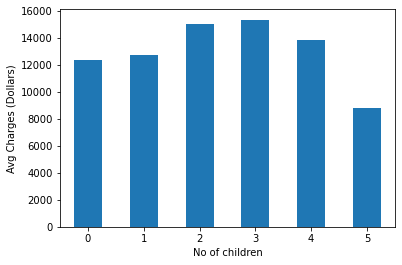

In [43]:
plt1 = df[['children', 'charges']].groupby("children").mean().plot(
    kind='bar',
    legend=False,
    
)
plt1.set_xlabel("No of children")
plt1.set_ylabel("Avg Charges (Dollars)")
xticks(rotation=0)
plt.show()

Gender Wise Distribution

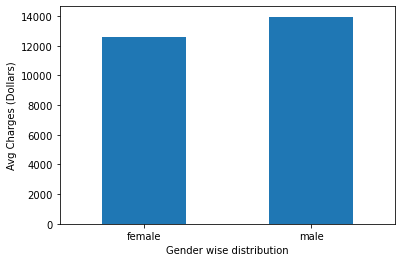

In [44]:
plt1 = df[['sex', 'charges']].groupby("sex").mean().plot(
    kind='bar',
    legend=False,
    
)
plt1.set_xlabel("Gender wise distribution")
plt1.set_ylabel("Avg Charges (Dollars)")
xticks(rotation=0)
plt.show()

BMI

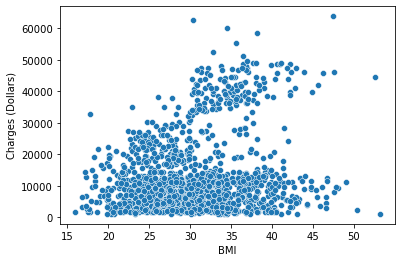

In [46]:
plt1 = sns.scatterplot(x='bmi', y='charges', data=df)
plt1.set_xlabel('BMI')
plt1.set_ylabel('Charges (Dollars)')
plt.show()

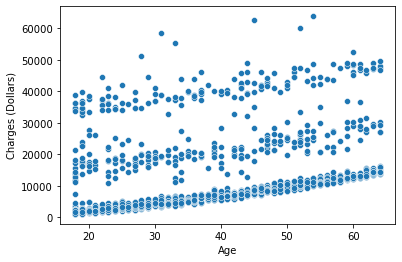

In [47]:
plt1 = sns.scatterplot(x='age', y='charges', data=df)
plt1.set_xlabel('Age')
plt1.set_ylabel('Charges (Dollars)')
plt.show()

Bivariate Analysis

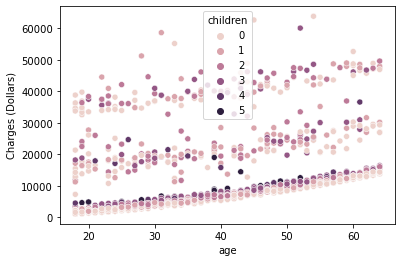

In [50]:
plt1 = sns.scatterplot(x='age', y='charges', 
                       hue='children', data=df)
plt1.set_xlabel('age')
plt1.set_ylabel('Charges (Dollars)')
plt.show()

Linear Regression Model

In [52]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [54]:
auto=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

In [55]:
auto.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Visualizing The Data

<Figure size 1080x1080 with 0 Axes>

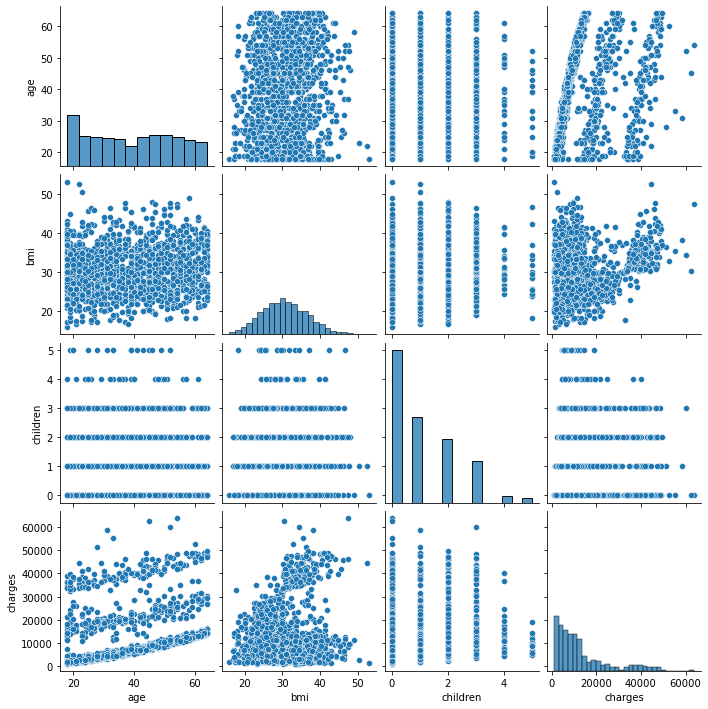

In [56]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

Visualising Categorical Variables


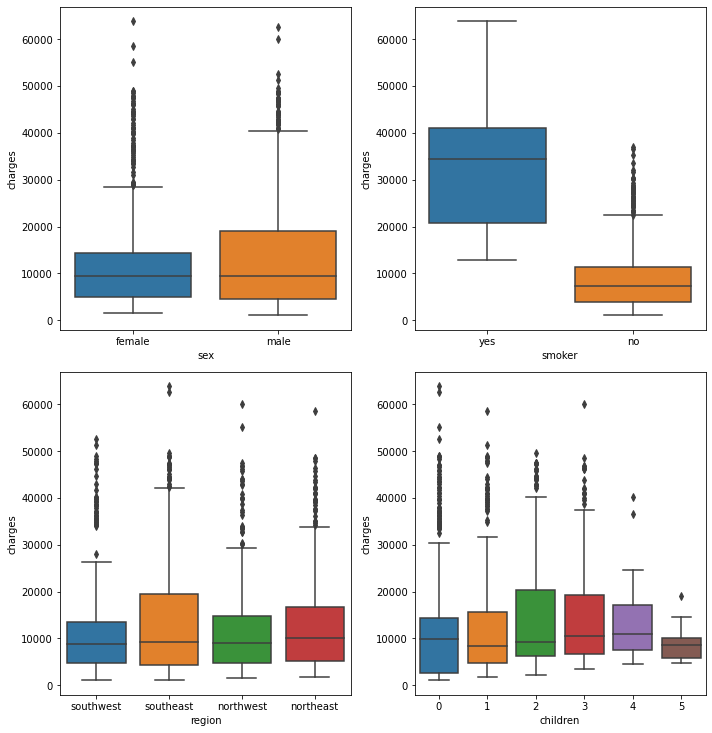

In [57]:
plt.figure(figsize=(10, 20))
plt.subplot(4, 2, 1)
sns.boxplot(x='sex', y='charges', data=auto)
plt.subplot(4, 2, 2)
sns.boxplot(x='smoker', y='charges', data=auto)
plt.subplot(4, 2, 3)
sns.boxplot(x='region', y='charges', data=auto)
plt.subplot(4, 2, 4)
sns.boxplot(x='children', y='charges', data=auto)

plt.tight_layout()
plt.show()

Data Preparation

Categorical Variable are converted into Numerical Variable with the help of dummy Variable

In [58]:
auto = pd.get_dummies(auto,
                      columns=[
                          'sex', 'smoker', 'region'               ],
                      drop_first=True)

In [61]:
auto

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [63]:
auto.shape

(1338, 9)

Model Building

Splitting the Data into Training and Testing sets

In [64]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(auto,
                                     train_size=0.8,
                                     test_size=0.2,
                                     random_state=100)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
num_vars = [
    'age', 'bmi', 'charges'
]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [69]:
df_train.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1306,0.239130,0.158461,0,0.239326,0,1,0,0,0
124,0.630435,0.483051,3,0.143549,0,0,1,0,0
588,0.934783,0.536723,0,0.199745,0,0,0,0,0
1127,0.369565,0.535378,2,0.075255,0,0,0,1,0
201,0.652174,0.437719,1,0.123694,0,0,0,1,0


In [70]:
df_train.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,0.459224,0.396595,1.088785,0.190635,0.495327,0.197196,0.247664,0.274766,0.243925
std,0.306464,0.165792,1.190297,0.191475,0.500212,0.398068,0.431857,0.446605,0.429649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.276500,0.000000,0.054905,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.388485,1.000000,0.129073,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.508710,2.000000,0.244561,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


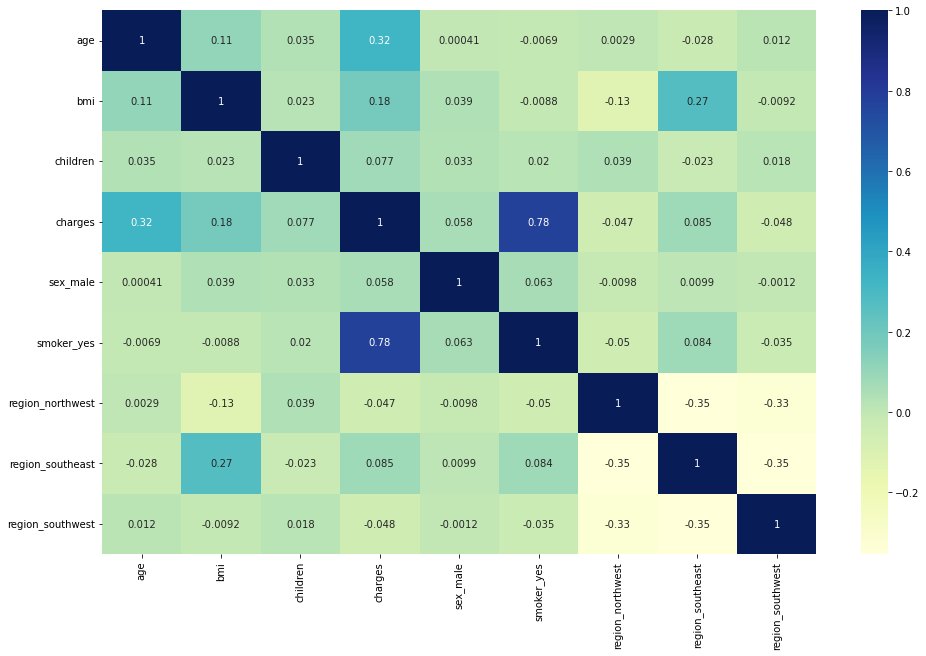

In [71]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

Dividing into X and Y sets for the model building

In [72]:
y_train = df_train.pop('charges')
X_train = df_train

In [73]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1306,0.239130,0.158461,0,0,1,0,0,0
124,0.630435,0.483051,3,0,0,1,0,0
588,0.934783,0.536723,0,0,0,0,0,0
1127,0.369565,0.535378,2,0,0,0,1,0
201,0.652174,0.437719,1,0,0,0,1,0


In [74]:
X_train.shape

(1070, 8)

RFE
Recursive feature elimination

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [76]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', True, 1),
 ('bmi', True, 1),
 ('children', True, 1),
 ('sex_male', True, 1),
 ('smoker_yes', True, 1),
 ('region_northwest', True, 1),
 ('region_southeast', True, 1),
 ('region_southwest', True, 1)]

In [78]:
col = X_train.columns[rfe.support_]
col

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [79]:
X_train_rfe = X_train[col]

In [80]:
import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)

In [81]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [82]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     373.7
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          2.28e-302
Time:                        18:05:52   Log-Likelihood:                 967.66
No. Observations:                1070   AIC:                            -1917.
Df Residuals:                    1061   BIC:                            -1873.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0439      0.011  

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [
    variance_inflation_factor(X.values, i) for i in range(X.shape[1])
]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,12.42
7,region_southeast,1.70
8,region_southwest,1.56
6,region_northwest,1.55
2,bmi,1.11
1,age,1.02
3,children,1.01
4,sex_male,1.01
5,smoker_yes,1.01


In [85]:
# Dropping cylindernumber_twelve as p-value is high.
X_train_new1 = X_train_rfe.drop(["sex_male"], axis=1)

# Adding a constant variable
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train, X_train_lm).fit()  # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     427.5
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          1.07e-303
Time:                        18:17:32   Log-Likelihood:                 967.66
No. Observations:                1070   AIC:                            -1919.
Df Residuals:                    1062   BIC:                            -1880.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0438      0.010  

In [86]:
# Dropping cylindernumber_twelve as p-value is high.
X_train_new1 = X_train_rfe.drop(["region_northwest"], axis=1)

# Adding a constant variable
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train, X_train_lm).fit()  # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     427.2
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          1.40e-303
Time:                        18:18:13   Log-Likelihood:                 967.38
No. Observations:                1070   AIC:                            -1919.
Df Residuals:                    1062   BIC:                            -1879.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0471      0.010  

In [88]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [
    variance_inflation_factor(X.values, i) for i in range(X.shape[1])
]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,12.42
7,region_southeast,1.70
8,region_southwest,1.56
6,region_northwest,1.55
2,bmi,1.11
1,age,1.02
3,children,1.01
4,sex_male,1.01
5,smoker_yes,1.01


Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [89]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

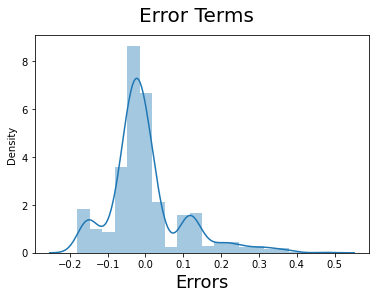

In [90]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize=20)  # Plot heading
plt.xlabel('Errors', fontsize=18)  # X-label

Making Predictions
Applying the scaling on the test sets

In [92]:
num_vars = [
    'age', 'bmi', 'charges'
]

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [93]:
y_test = df_test.pop('charges')
X_test = df_test

In [94]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
12,0.108696,0.545356,0,1,0,0,0,1
306,0.217391,0.331369,2,0,0,0,0,1
318,0.565217,0.335866,0,0,0,1,0,0
815,0.043478,0.454179,0,0,0,0,1,0
157,0.000000,0.259265,0,1,1,0,0,0


In [95]:
X_train_lm.columns

Index(['const', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [96]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_southeast', 'region_southwest']]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [97]:
# Making predictions
y_pred = lm.predict(X_test_new)

Model Evaluation

In [98]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7886930885570412

Text(0, 0.5, 'y_pred')

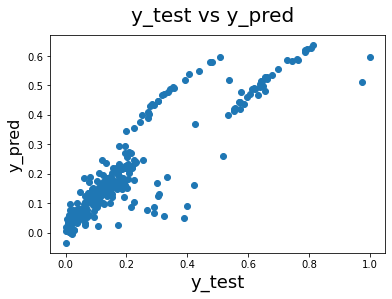

In [99]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  # Plot heading
plt.xlabel('y_test', fontsize=18)  # X-label
plt.ylabel('y_pred', fontsize=16)  # Y-label

In [100]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Init, fit
rfecv = RFECV(
    estimator=LinearRegression(),
    min_features_to_select=5,
    step=5,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)

_ = rfecv.fit(X_train, y_train)

In [101]:
X_train.columns[rfecv.support_]

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [102]:
len(X_train.columns[rfecv.support_])

8

In [103]:
len(X_train.columns)

8

In [104]:
X_train.loc[:, rfecv.support_]


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1306,0.239130,0.158461,0,0,1,0,0,0
124,0.630435,0.483051,3,0,0,1,0,0
588,0.934783,0.536723,0,0,0,0,0,0
1127,0.369565,0.535378,2,0,0,0,1,0
201,0.652174,0.437719,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
802,0.065217,0.170568,1,1,0,0,0,1
53,0.391304,0.496906,0,1,1,0,1,0
350,0.847826,0.194243,0,0,0,1,0,0
79,0.500000,0.457493,0,0,0,1,0,0


In [105]:
X_train_rfecv = X_train.loc[:, rfecv.support_]

In [106]:

X_test_rfecv = X_test.loc[:, rfecv.support_]

In [107]:
lr = LinearRegression()
_ = lr.fit(X_train_rfecv, y_train)

print("Training R-sqaured:", lr.score(X_train_rfecv, y_train))
print("Testing R-squared:", lr.score(X_test_rfecv, y_test))

Training R-sqaured: 0.738063690417642
Testing R-squared: 0.7887070553052818


In [108]:
lr = LinearRegression()
_ = lr.fit(X_train, y_train)

print("Training R-sqaured:", lr.score(X_train, y_train))
print("Testing R-squared:", lr.score(X_test, y_test))

Training R-sqaured: 0.738063690417642
Testing R-squared: 0.7887070553052818
